# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Aritra Chowdhury

EID: ac79277

Name: Vishu Agarwal

EID: va7729

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

### a) 
The following mathematical representation is bias of the estimator at a point x0. It represents the extent to which the prediction for a given data point x0 differs from the true value f(x0). If we poerform this operation over multiple data points, we will obtain bias of the model.  

### b)
To explain the reason behind the existence of tradeoff between bias and variance, we will first look into what bias and variance is.

Bias is the measure of how much average prediction of model differs from the actual value which we are trying to predict. Model with very high bias ignores the training data and oversimplifies the model.

Variance is the variability of model prediction for a given data point. Model with high variance pays a lot of attention (much more than needed) to training data and does not generalize on the data which it hasn’t seen before. 

Due to the very definition of these two, we can clearly see that they are inversely proportional to each other, i.e. data with high bias oversimpliefies the model and hence has minimal variance. On the other hand, model with high variance over complicates the model (model tries to predict all the training points and ends up capturing a lot of noise) and hence has very low bias. To fit a good model, we need to find a sweet spot between variance and bias.  

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


## Answer:

In [2]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%pylab inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

Populating the interactive namespace from numpy and matplotlib


### Part (a)

In [91]:
def plot_curves(x_train, y_train, x_test, y_test):
    # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    # Print out the mean squared error (on both train and test sets) for all the models. 
    # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

    # YOUR CODE COMES HERE
    #creating a dataframe for training and test data 
    df_train = pd.DataFrame(x_train, y_train).reset_index()
    df_train.rename(columns = {'index' : 'y_train', 0 : 'x_train'}, inplace = True)
    df_train = df_train.sort_values('x_train') 

    df_test = pd.DataFrame(x_test, y_test).reset_index()
    df_test.rename(columns = {'index' : 'y_test', 0 : 'x_test'}, inplace = True)
    df_test = df_test.sort_values('x_test') 

    #redefining x_train, x_test, y_train, y_test based on pre-processing 
    x_train = df_train['x_train'].to_numpy().reshape(-1,1)
    y_train = df_train['y_train'].to_numpy()
    x_test = df_test['x_test'].to_numpy().reshape(-1,1)
    y_test = df_test['y_test'].to_numpy()

    train_rmse = []
    test_rmse = []

    print('\033[1m\033[4mMSE Values\033[0m\n')
    
    #plotting the graphs 
    plt.scatter(x_train, y_train, marker = 'o', color = 'blue', linestyle = 'None', label = 'Train Data')
    plt.scatter(x_test, y_test, marker = 'o', color = 'red', linestyle = 'None', label = 'Test Data')
    #set_title('y_train vs x_train')

    for i in [2,4,7]:
        x_train_poly = np.vander(np.squeeze(x_train), i+1)
        x_test_poly = np.vander(np.squeeze(x_test), i+1)
        x_all_poly = np.vander(np.squeeze(x_all), i+1)
    
        print('\033[1mPolynomial Degree:', i)

        lrp.fit(x_train_poly, y_train)
        y_train_pred = lrp.predict(x_train_poly)
        y_test_pred = lrp.predict(x_test_poly)
        y_all_pred = lrp.predict(x_all_poly)

        print('\033[0m' + 'Mean Squared Error on Train Set:', mean_squared_error(y_train, y_train_pred))
        print('Mean Squared Error on Test Set:', mean_squared_error(y_test, y_test_pred))
        print()

        train_rmse.append(mean_squared_error(y_train, y_train_pred))
        test_rmse.append(mean_squared_error(y_test, y_test_pred))

        plt.plot(x_all, y_all_pred, label = str(i) + ' degree polynomial')
        #plot(x_test, y_test_pred, label = str(i) + ' degree polynomial')
        #ax4.set_title('Predictions on x_test by different models vs x_test')
        
        plt.rcParams["figure.figsize"] = (30,15)
        plt.ylim(-600,600)
        legend()

    show()

    return train_rmse, test_rmse

In [ ]:
def plot_curves(x_train, y_train, x_test, y_test):
    # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    # Print out the mean squared error (on both train and test sets) for all the models. 
    # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

    # YOUR CODE COMES HERE
    #creating a dataframe for training and test data 
    df_train = pd.DataFrame(x_train, y_train).reset_index()
    df_train.rename(columns = {'index' : 'y_train', 0 : 'x_train'}, inplace = True)
    df_train = df_train.sort_values('x_train') 

    df_test = pd.DataFrame(x_test, y_test).reset_index()
    df_test.rename(columns = {'index' : 'y_test', 0 : 'x_test'}, inplace = True)
    df_test = df_test.sort_values('x_test') 

    #redefining x_train, x_test, y_train, y_test based on pre-processing 
    x_train = df_train['x_train'].to_numpy().reshape(-1,1)
    y_train = df_train['y_train'].to_numpy()
    x_test = df_test['x_test'].to_numpy().reshape(-1,1)
    y_test = df_test['y_test'].to_numpy()

    train_rmse = []
    test_rmse = []

    print('\033[1m\033[4mMSE Values\033[0m\n')

    fig, (ax1, ax2, ax3, ax4) = subplots(nrows = 1,
                                         ncols = 4,
                                         figsize = (25,8))
    
    ax1.plot(x_train, y_train, marker = 'o', color = 'blue', linestyle = 'None')
    ax1.set_title('y_train vs x_train')
    
    ax2.plot(x_test, y_test, marker = 'o', color = 'blue', linestyle = 'None')
    ax2.set_title('y_test vs x_test')

    for i in [2,4,7]:
        x_train_poly = np.vander(np.squeeze(x_train), i+1)
        x_test_poly = np.vander(np.squeeze(x_test), i+1)
        x_all_poly = np.vander(np.squeeze(x_all), i+1)
    
        print('\033[1mPolynomial Degree:', i)

        lrp.fit(x_train_poly, y_train)
        y_train_pred = lrp.predict(x_train_poly)
        y_test_pred = lrp.predict(x_test_poly)
        y_all_pred = lrp.predict(x_all_poly)

        print('\033[0m' + 'Mean Squared Error on Train Set:', mean_squared_error(y_train, y_train_pred))
        print('Mean Squared Error on Test Set:', mean_squared_error(y_test, y_test_pred))
        print()

        train_rmse.append(mean_squared_error(y_train, y_train_pred))
        test_rmse.append(mean_squared_error(y_test, y_test_pred))

        ax3.plot(x_all, y_all_pred, label = str(i) + ' degree polynomial')
        ax3.set_title('Predictions on x_all by different models vs x_all')
        ax3.legend()

        ax4.plot(x_test, y_test_pred, label = str(i) + ' degree polynomial')
        ax4.set_title('Predictions on x_test by different models vs x_test')
        ax4.legend()

    show()

    return train_rmse, test_rmse

MSE Values

Polynomial Degree: 2
Mean Squared Error on Train Set: 247.2967979737153
Mean Squared Error on Test Set: 320.0640834697787

Polynomial Degree: 4
Mean Squared Error on Train Set: 31.720018057290044
Mean Squared Error on Test Set: 31.292082886606693

Polynomial Degree: 7
Mean Squared Error on Train Set: 30.677193592109724
Mean Squared Error on Test Set: 33.41069407769013



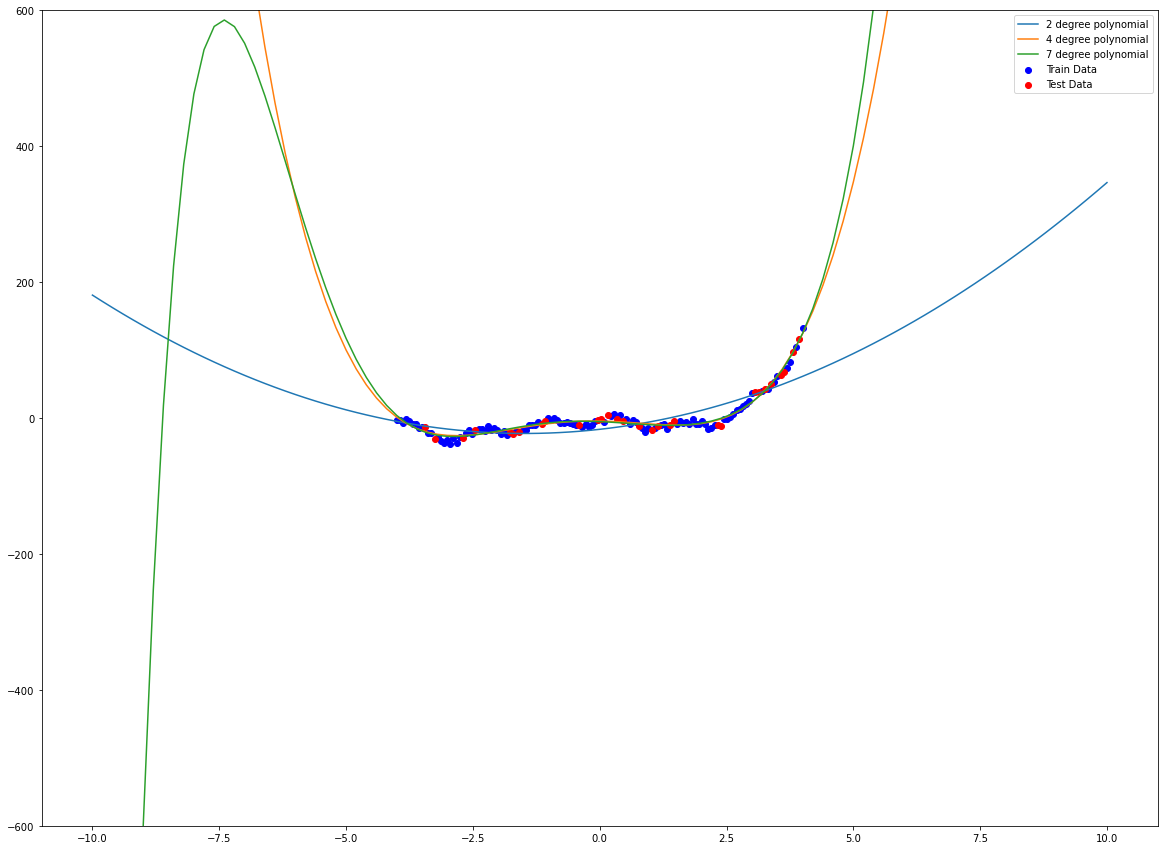

In [92]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

### Part (b)

**The 4-degree Polynomial model gives the best performance.**

As explained earlier, expected loss = (bias)^2 + variance + noise. So we need the right balance between bias and variance to get the minimum expected loss (MSE). 

As we can see from the above plots, the 2-degree polynomial model is more rigid with a high bias and low variance when compared to the data. The high bias can be further seen from the extremely high MSE values (247.3 for training data and 320.1 for test data).

On the other hand, the 7-degree polynomial model is extremely flexible with a low bias and high variance, leading to overfitting issues. This can be seen from the MSE values as well where the training set has the lowest MSE (30.7) out of the 3 models but the test MSE is higher (33.4).

The 4-degree polynomial model provides the best balance between bias and variance to minimize the overall expected loss. While the training MSE (31.7) is higher than that of the 7-degree polynomial, the test MSE (31.3) is the lowest when compared to the other models. This is because this model fits the data the best while not leading to overfitting like the 7-degree polynomial model or more rigidity like the 2-degree polynomial model. 

### Part (c)

20% data
MSE Values

Polynomial Degree: 2
Mean Squared Error on Train Set: 161.17147378830043
Mean Squared Error on Test Set: 402.323126909929

Polynomial Degree: 4
Mean Squared Error on Train Set: 35.115113139129804
Mean Squared Error on Test Set: 38.34074498344271

Polynomial Degree: 7
Mean Squared Error on Train Set: 22.54394669137326
Mean Squared Error on Test Set: 135.20764526756284



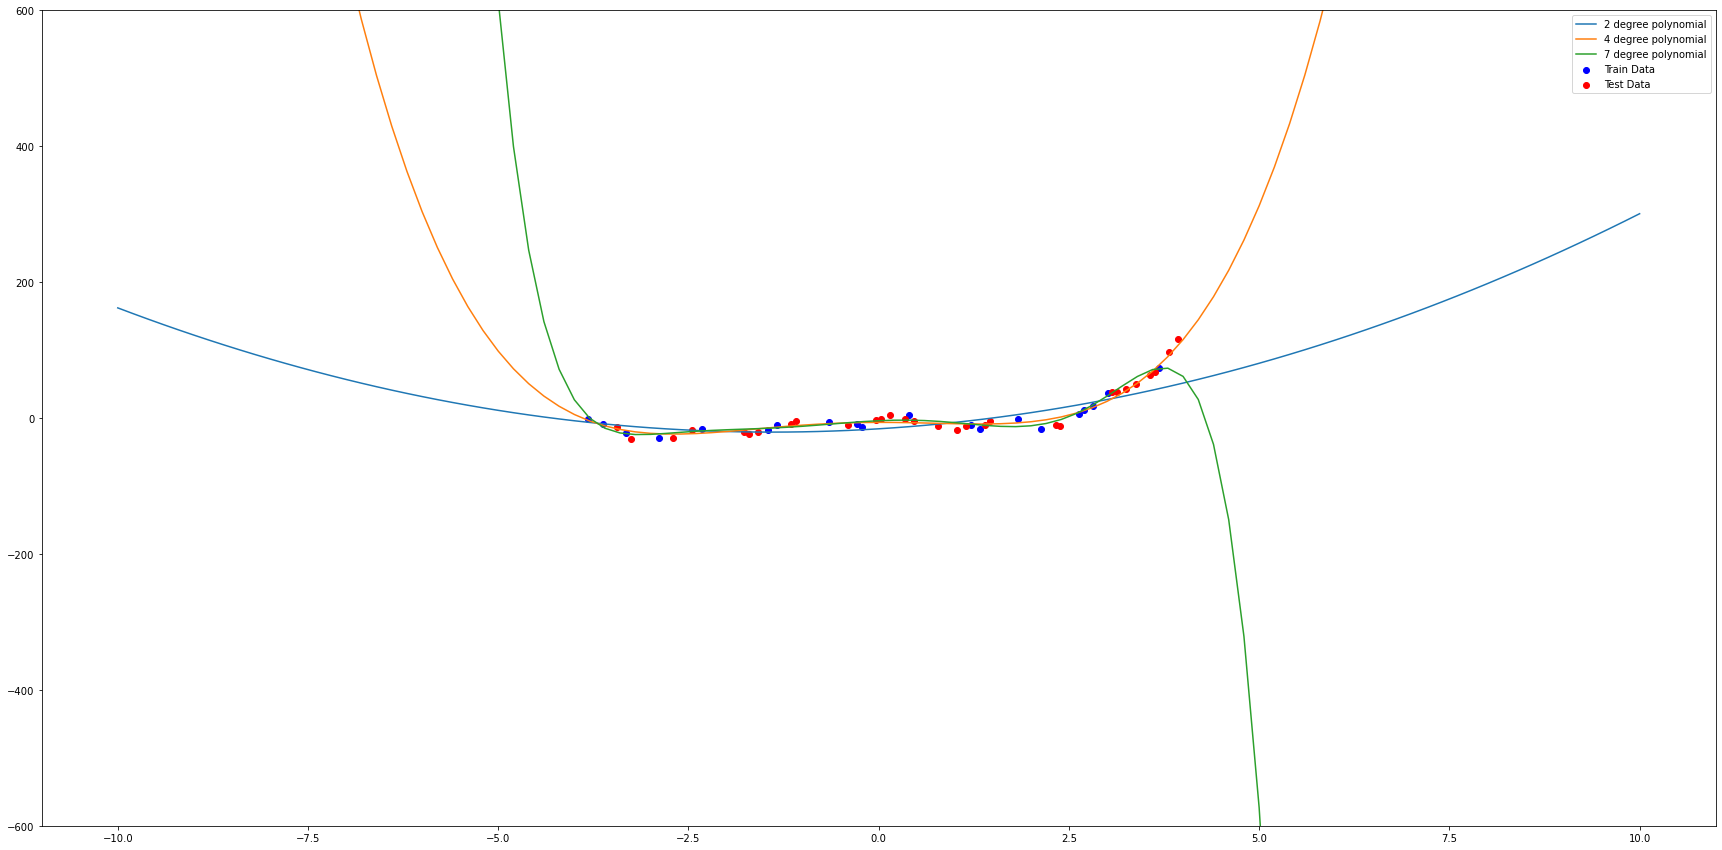

40% data
MSE Values

Polynomial Degree: 2
Mean Squared Error on Train Set: 150.33251286085704
Mean Squared Error on Test Set: 405.80516696165733

Polynomial Degree: 4
Mean Squared Error on Train Set: 31.62452964644691
Mean Squared Error on Test Set: 33.164282959187396

Polynomial Degree: 7
Mean Squared Error on Train Set: 25.492718751653644
Mean Squared Error on Test Set: 61.237418845510305



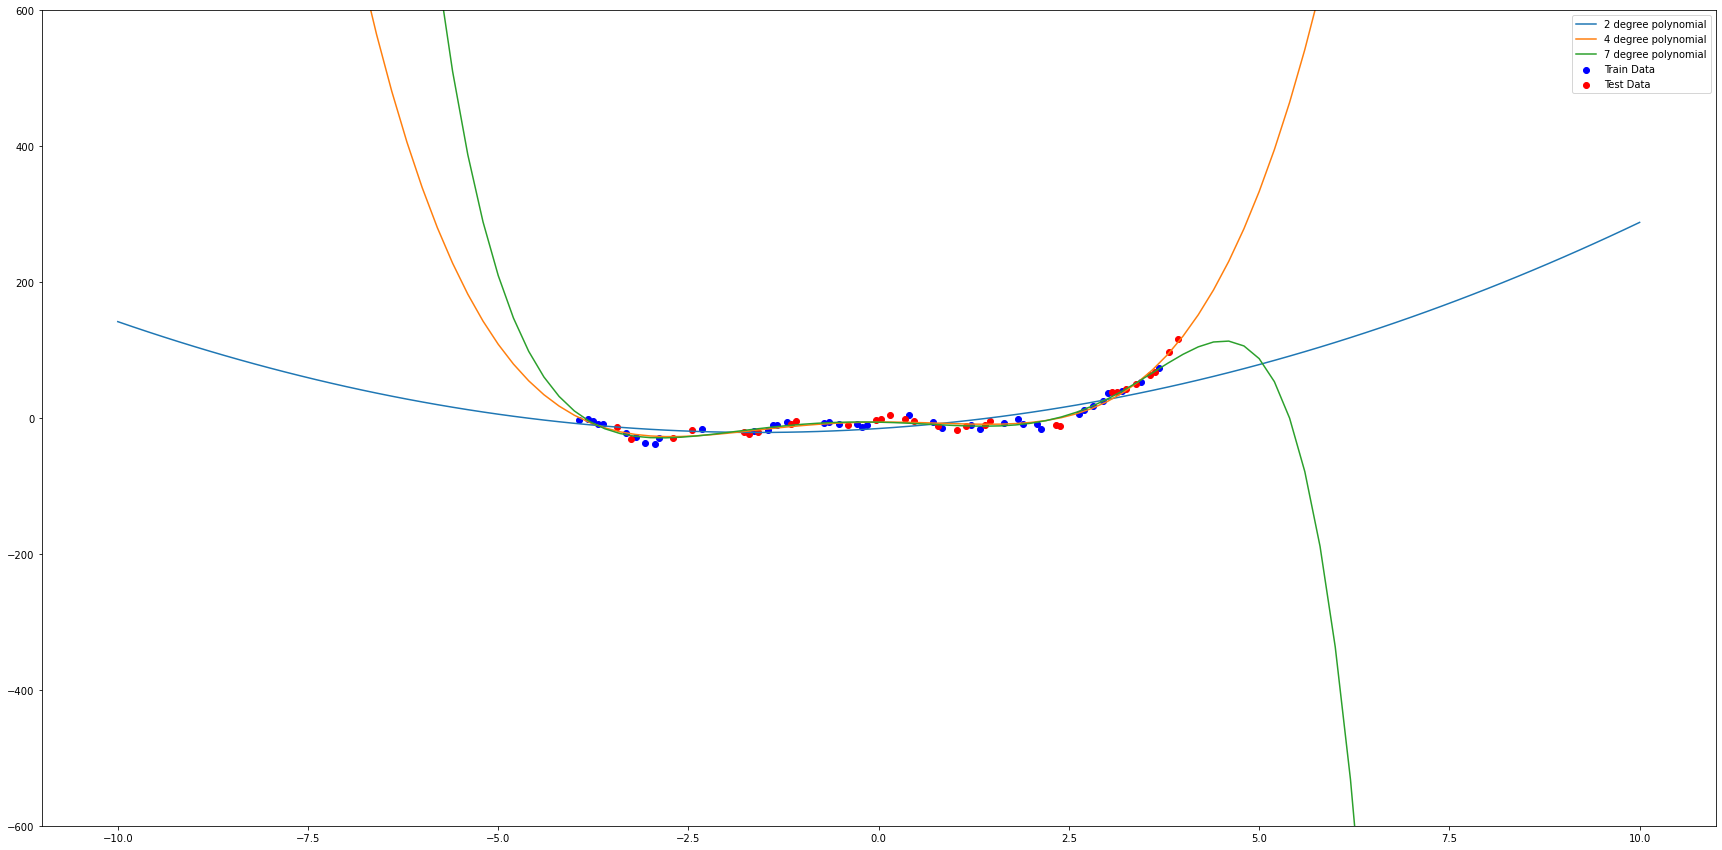

60% data
MSE Values

Polynomial Degree: 2
Mean Squared Error on Train Set: 150.0838375914173
Mean Squared Error on Test Set: 403.2513784833409

Polynomial Degree: 4
Mean Squared Error on Train Set: 29.192805739947897
Mean Squared Error on Test Set: 31.781415416196733

Polynomial Degree: 7
Mean Squared Error on Train Set: 26.0990886424544
Mean Squared Error on Test Set: 60.16667237664495



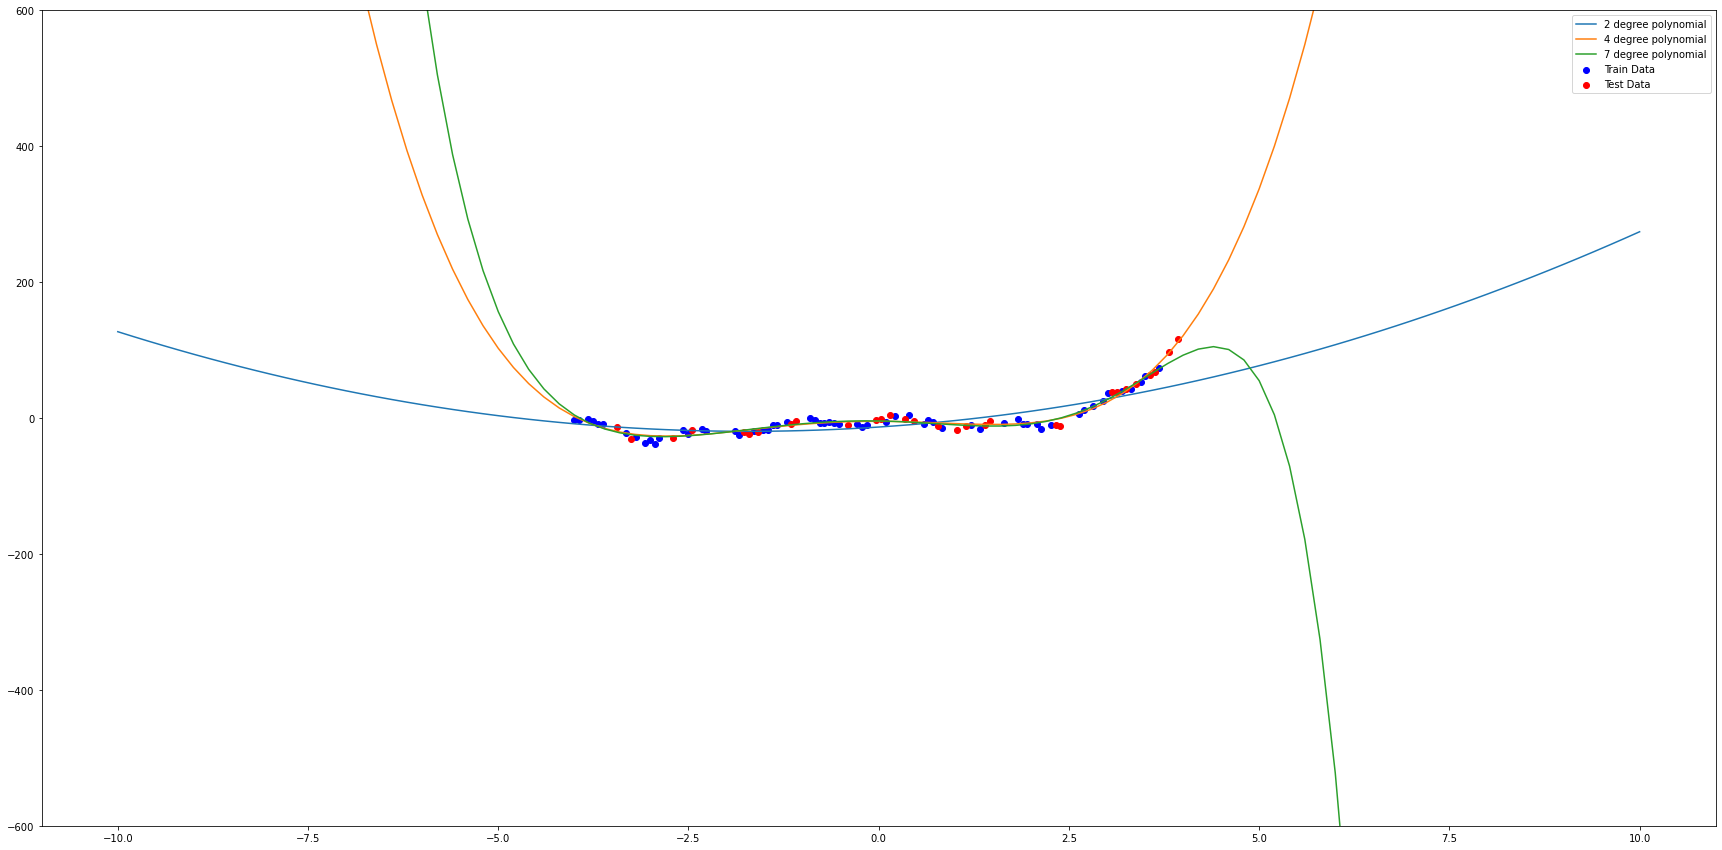

80% data
MSE Values

Polynomial Degree: 2
Mean Squared Error on Train Set: 168.11882461502813
Mean Squared Error on Test Set: 407.5936968818473

Polynomial Degree: 4
Mean Squared Error on Train Set: 29.305108483323448
Mean Squared Error on Test Set: 32.51810686874258

Polynomial Degree: 7
Mean Squared Error on Train Set: 26.54912959628364
Mean Squared Error on Test Set: 48.076935297107894



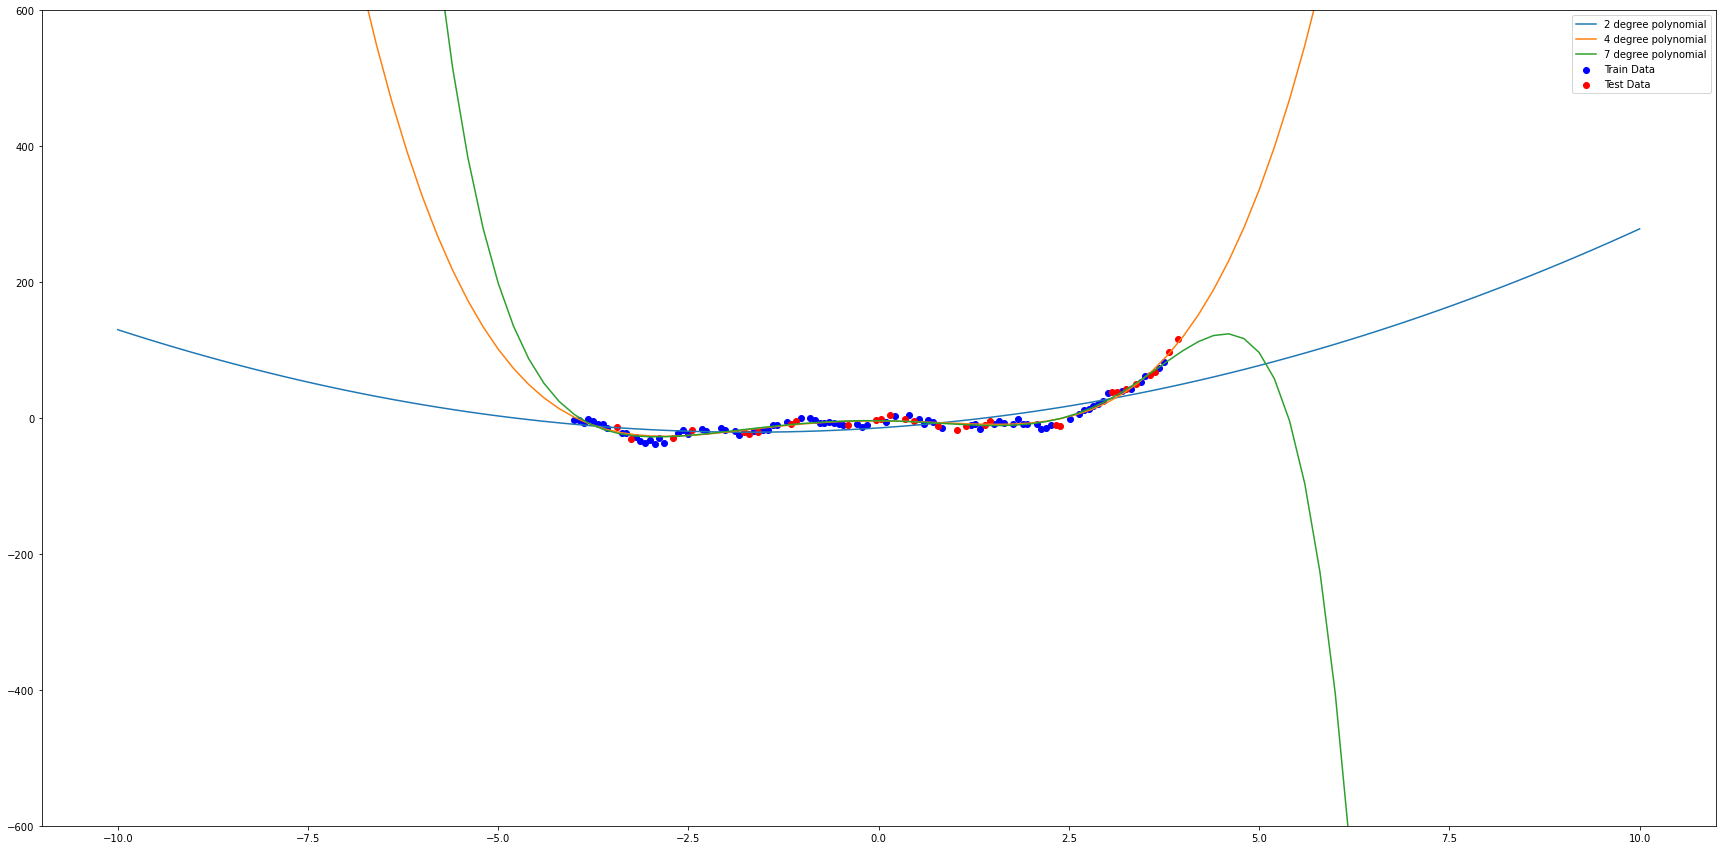

100% data
MSE Values

Polynomial Degree: 2
Mean Squared Error on Train Set: 247.2967979737153
Mean Squared Error on Test Set: 320.0640834697787

Polynomial Degree: 4
Mean Squared Error on Train Set: 31.720018057290044
Mean Squared Error on Test Set: 31.292082886606693

Polynomial Degree: 7
Mean Squared Error on Train Set: 30.677193592109724
Mean Squared Error on Test Set: 33.41069407769013



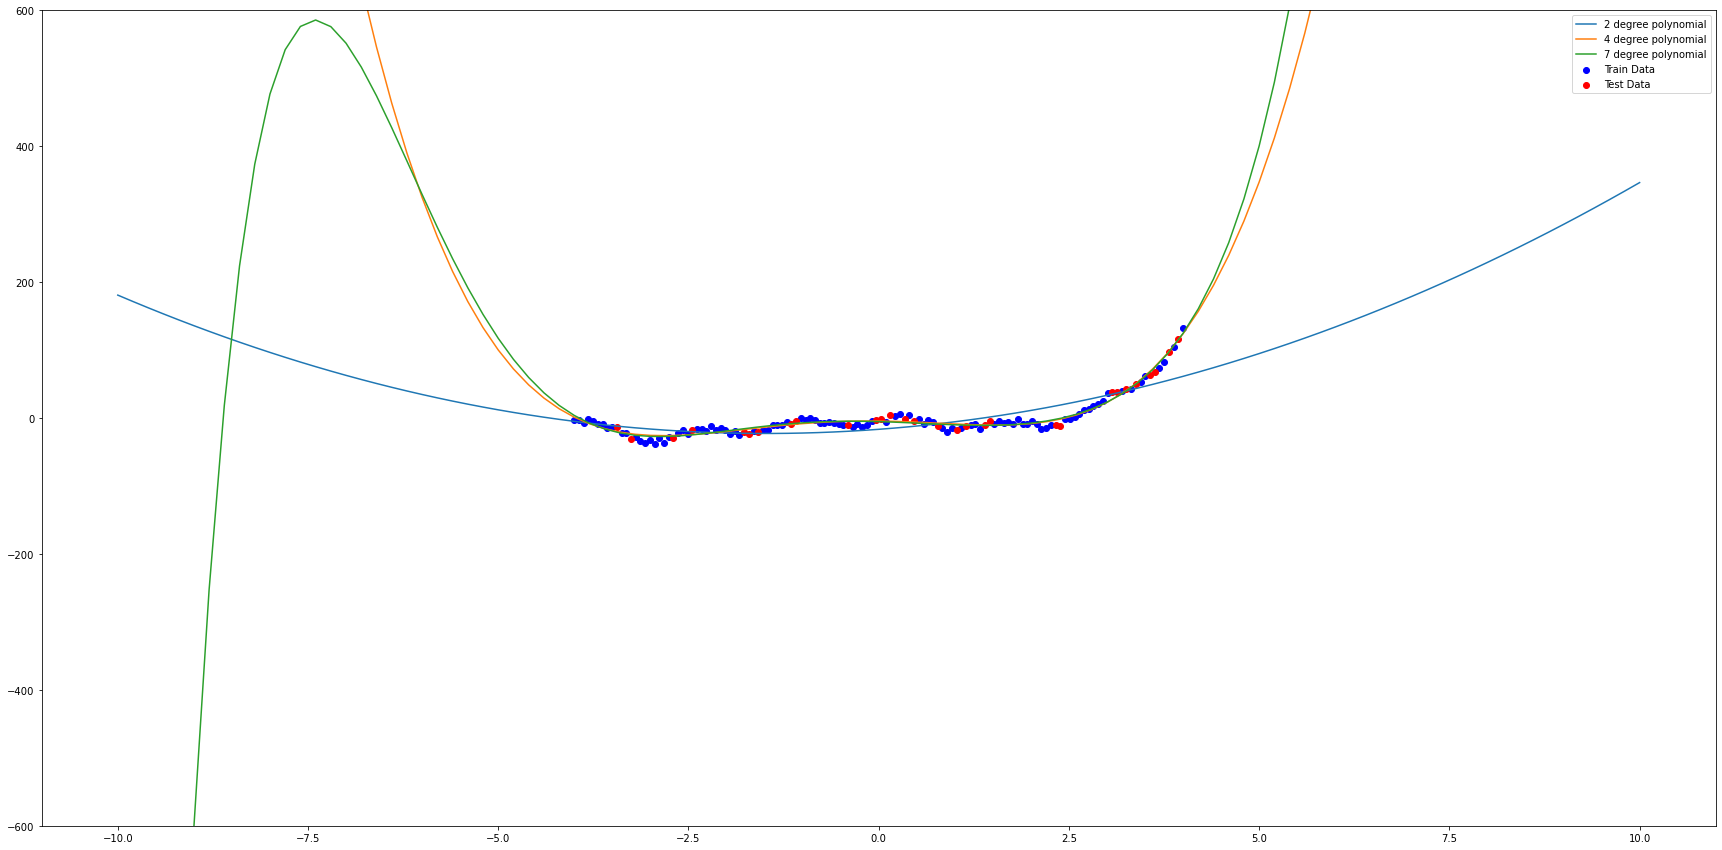

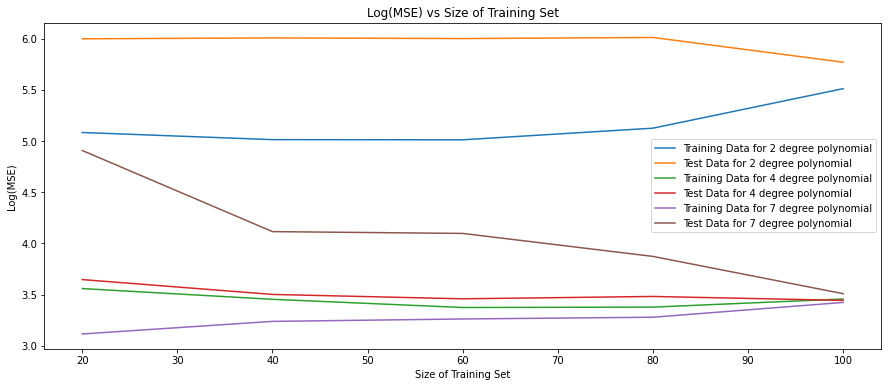

In [93]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

x_axis = [20,40,60,80,100]

plt.figure(figsize=(15,6))

for i in [0,1,2]:
    y_axis_train = [train_rmses_20[i], train_rmses_40[i], train_rmses_60[i], train_rmses_80[i], train_rmses_100[i]]
    y_axis_test = [test_rmses_20[i], test_rmses_40[i], test_rmses_60[i], test_rmses_80[i], test_rmses_100[i]]
    if i == 0:
        degree = 2
    else:
        degree = (i**2)+3
    plt.plot(x_axis, np.log(y_axis_train), label = 'Training Data for ' + str(degree) + ' degree polynomial')
    plt.plot(x_axis, np.log(y_axis_test), label = 'Test Data for ' + str(degree) + ' degree polynomial')

plt.legend()
plt.title('Log(MSE) vs Size of Training Set')
plt.xlabel('Size of Training Set')
plt.ylabel('Log(MSE)')
plt.show()


**2-degree Polynomial**

Before we reach the 80% training size, the MSE values for both training and test data remain fairly constant since the model is fairly rigid (high bias, low variance). We see that the MSE values for the Training Data increases significantly when crossing the 80% data size. This is because 80% of the data is adequate in fitting the model and the additional 20% leads to extra data points on the same trend. This causes additional data points to contribute to the overall MSE value while not changing the equation of the final fitted model. The test MSE, however, decreases post 80% since the additional training data allows the model to account for further data points, increasing the efficiency for test data predictions. 

**4-degree Polynomial**

We see that both the Training and Test Data MSEs remain fairly constant with different sizes of training set. This is because the 4-degree polynomial model strikes the right balance between bias and variance and is able to explain the data fairly well regardless of data size. There is a slight increase in the training MSE post 80% data size, which can be explained with the same reasoning as explained in the case of the 2-degree polynomial model. 

**7-degree Polynomial**

For low sizes, the Test MSE is fairly high, while the Training MSE is fairly low. This is because this model is a low-bias high-variance model and tends to overfit the data, causing low Training MSEs and high Test MSEs. This issue is fixed as we keep increasing the data size, as increasing the size of data reduces the overall variance of the model. The training MSE again increases post the 80% data size due to the above explained reasons. 


# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

### a)
Both gradient descent and stochastic gradient descent involves updating a set of parameters in an iterative manner to minimize an error function. However, there is a key difference in their methodology. 

Gradient descent involves processing all the data points in training set to do a single update for a parameter in a particular iteration. While, in stochastic gradient descent, only one data point or a subset of data points from  training set is leveraged to update a parameter in a particular iteration. 

Key advantage/disadvantage: 
In case of large training samples, using gradient descent might be computationally expensive and require a lot of time because in every iteration, every data point is processed to update the parameters. While, stochastic gradient descent will be faster because it involves using only one training sample and it starts improving itself right away from the first sample.

For this very reason, SGD often converges much faster compared to GD but the error function is not as well minimized as in the case of GD. Additioanlly, SGD is less prone to local minima than gradient descent and hence SGD is more reliablw for complex models. 

### b)
Nelder-Mead method: This algorithm involves sampling two relatively near points, and repeatedly taking a step down away from the largest value. 

The major problem with this approach can be using a 'fixed' step size: algorithm will not be able to get closer to the true minima than the step size so it would not converge. Also, if the fixed step size is too small, algorithm will spend too much time progressing towards the minima. 

Nelder-Mead method overcomes this problem by dynamically adjusting the step size based on the value of new point. If the new point is better (lower value) than any previous value, it expands the step size to accelerate towards the minima. Similarly, if the new point is worse (greater than some of the previous values) it reduces the step size to converge around the minima.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$

To derive the coeffieint updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model, we first compute the Loss Function $E$ as the sum of least squares followed by partial derivates with respect to each of the 4 coefficients. The updated coefficient is then calculated using the following formula:

$$ w^{new} = w^{old} - \eta \Delta E = w^{old} - \eta \frac{\delta E}{\delta w^{old}} $$

The Loss Function $E$ is computed as follows.

$$ E = \sum \limits _{i=1} ^{n} (y_{i} - \hat{y}_{i})^2 = \sum \limits _{i=1} ^{n} [y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})]^2 $$

We now calculate the Gradients with respect to each of the 4 coefficients. 

$$ \frac{\delta E}{\delta w_0} = -2 \sum \limits _{i=1} ^{n} [y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})] = 2 \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i}) $$

$$ \frac{\delta E}{\delta w_1} = -2x_{1} \sum \limits _{i=1} ^{n} [y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})] = 2x_{1} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i}) $$

$$ \frac{\delta E}{\delta w_2} = -2x_{1}x_{2} \sum \limits _{i=1} ^{n} [y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})] = 2x_{1}x_{2} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i}) $$

$$ \frac{\delta E}{\delta w_3} = -2e^{-x_1} \sum \limits _{i=1} ^{n} [y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})] = 2e^{-x_1} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i}) $$

The Updated Coefficients are as follows. 

$$ w_{0}^{new} = w_{0}^{old} - \eta \frac{\delta E}{\delta w_{0}^{old}} = w_{0}^{old} - \eta [2 \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i})] $$

$$ w_{1}^{new} = w_{1}^{old} - \eta \frac{\delta E}{\delta w_{1}^{old}} = w_{1}^{old} - \eta [2 x_{1} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i})] $$

$$ w_{2}^{new} = w_{2}^{old} - \eta \frac{\delta E}{\delta w_{2}^{old}} = w_{2}^{old} - \eta [2 x_{1}x_{2} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i})] $$

$$ w_{3}^{new} = w_{3}^{old} - \eta \frac{\delta E}{\delta w_{3}^{old}} = w_{3}^{old} - \eta [2 e^{-x_1} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i})] $$

**Regularization Case (Ridge Regression)**

In the case of Ridge Regularization, the Loss Function $E$ becomes the following. 

$$ E = \sum \limits _{i=1} ^{n} (y_{i} - \hat{y}_{i})^2 + \lambda \sum \limits _{j=1} ^{p} w _{j} ^{2} = \sum \limits _{i=1} ^{n} [y_{i} - (\hat{w}_0 + \hat{w}_1x_1 + \hat{w}_2 x_1x_2 + \hat{w}_3e^{-x_1})]^2 + \lambda (w_0^2 + w_1^2 + w_2^2 + w_3^2) $$

The Updated Coefficients are now the following.

$$ w_{0}^{new} = w_{0}^{old} - \eta \frac{\delta E}{\delta w_{0}^{old}} = w_{0}^{old} - \eta [2 \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i}) + 2 \lambda w_0^{old}] $$

$$ w_{1}^{new} = w_{1}^{old} - \eta \frac{\delta E}{\delta w_{1}^{old}} = w_{1}^{old} - \eta [2 x_{1} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i}) + 2 \lambda w_1^{old}] $$

$$ w_{2}^{new} = w_{2}^{old} - \eta \frac{\delta E}{\delta w_{2}^{old}} = w_{2}^{old} - \eta [2 x_{1}x_{2} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i}) + 2 \lambda w_2^{old}] $$

$$ w_{3}^{new} = w_{3}^{old} - \eta \frac{\delta E}{\delta w_{3}^{old}} = w_{3}^{old} - \eta [2 e^{-x_1} \sum \limits _{i=1} ^{n} (\hat{y}_{i} - y_{i}) + 2 \lambda w_3^{old}] $$

The above coefficient updates in the case of ridge regularization are what we use when coding Stochastic Gradient Descent below.

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

## Answer:

In [99]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate * gradient)
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
              
                # Compute error
                x_term = X[i,:]
                error_n = self.linearPredict(x_term) - y[i]

                # Compute gradients
                gradient = np.array([2*error_n*x_term[0] + 2*self.regularization*self.coef[0], 
                                     2*error_n*x_term[1] + 2*self.regularization*self.coef[1], 
                                     2*error_n*x_term[2] + 2*self.regularization*self.coef[2], 
                                     2*error_n*x_term[3] + 2*self.regularization*self.coef[3]]) 
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        #compute the dot product of self.coef and X
        dot_product = np.dot(X, self.coef)
        return dot_product     

In [100]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

### Part (a)

Combo 1
Learning Rate: 0.01
Regularization: 0

Combo 2
Learning Rate: 0.001
Regularization: 0

The first 2 plots are for Combo 1, the next 2 plots are for Combo 2


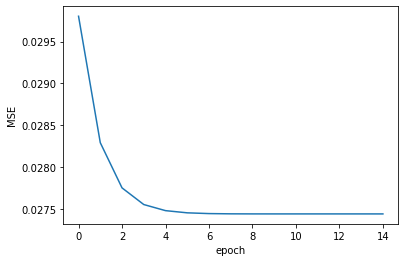

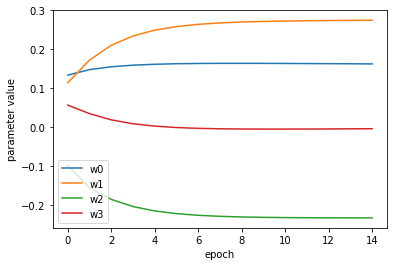

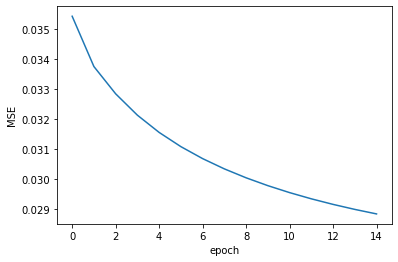

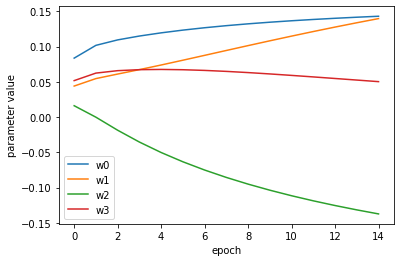

In [101]:
import warnings
warnings.filterwarnings("ignore")

learn_reg_list = []
for i in range(0, len(learning_rate)):
    for j in range(0, len(regularization)):
        learn_reg_list.append((learning_rate[i], regularization[j]))

lowest_mses = []

for i in range(0, len(learn_reg_list)):
    model = Regression(learn_reg_list[i][0], learn_reg_list[i][1], n_epochs)
    model.fit(X, y, plot = False)
    lowest_mses.append(model.lowest_mse)

lowest_mse_indices = np.argsort(np.array(lowest_mses))[:2]

lowest_mses_final = []

print('\033[1mCombo 1\033[0m')
print('Learning Rate:', learn_reg_list[lowest_mse_indices[0]][0])
print('Regularization:', learn_reg_list[lowest_mse_indices[0]][1])
model = Regression(learn_reg_list[lowest_mse_indices[0]][0], learn_reg_list[lowest_mse_indices[0]][1], n_epochs)
model.fit(X, y, plot = True)
lowest_mses_final.append(model.lowest_mse)

print()
print('\033[1mCombo 2\033[0m')
print('Learning Rate:', learn_reg_list[lowest_mse_indices[1]][0])
print('Regularization:', learn_reg_list[lowest_mse_indices[1]][1])
model = Regression(learn_reg_list[lowest_mse_indices[1]][0], learn_reg_list[lowest_mse_indices[1]][1], n_epochs)
model.fit(X, y, plot = True)
lowest_mses_final.append(model.lowest_mse)

print('\nThe first 2 plots are for Combo 1, the next 2 plots are for Combo 2')

### Part (b)

In [103]:
print('Lowest MSE for Combo 1:', lowest_mses_final[0])
print('Lowest MSE for Combo 2:', lowest_mses_final[1])

Lowest MSE for Combo 1: 0.02744454800243015
Lowest MSE for Combo 2: 0.028842167362254173
